In [18]:
import pandas as pd

In [19]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")

In [20]:
pref["日付"] = pd.to_datetime(pref["日付"] )

In [21]:
all_jp = pref.groupby(["日付"], as_index=False).sum()
del all_jp["都道府県コード"]
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]

In [22]:
all_jp["weekday"] = all_jp["日付"].dt.weekday

## 移動平均

In [23]:
all_jp["感染者数移動平均7"] = all_jp["各地の感染者数_1日ごとの発表数"].rolling(7).mean()
all_jp["死者数移動平均7"] = all_jp["各地の死者数_1日ごとの発表数"].rolling(7).mean()
all_jp.tail()

,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,weekday,感染者数移動平均7,死者数移動平均7
480,2021-05-10,4926,71,0,5321.571429,77.857143
481,2021-05-11,6236,113,1,5613.714286,86.857143
482,2021-05-12,7051,106,2,6042.142857,93.428571
483,2021-05-13,6872,101,3,6403.285714,98.571429
484,2021-05-14,6263,81,4,6436.428571,89.000000


## 曜日別陽性者集計

In [24]:
all_jp_week_mean = all_jp.groupby(["weekday"]).mean()[["各地の感染者数_1日ごとの発表数","各地の死者数_1日ごとの発表数"]].sort_index()
weekdays = pd.DataFrame({"曜日":["月","火","水","木","金","土","日"]})
all_jp_week_mean = pd.merge(all_jp_week_mean, weekdays, left_on="weekday", right_index=True, how="left")
all_jp_week_mean


,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,曜日
weekday,,,
0,947.362319,21.072464,月
1,1279.086957,27.289855,火
2,1495.550725,26.782609,水
3,1587.885714,24.800000,木
4,1548.200000,27.200000,金
5,1534.695652,20.942029,土
6,1273.202899,16.072464,日


In [25]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


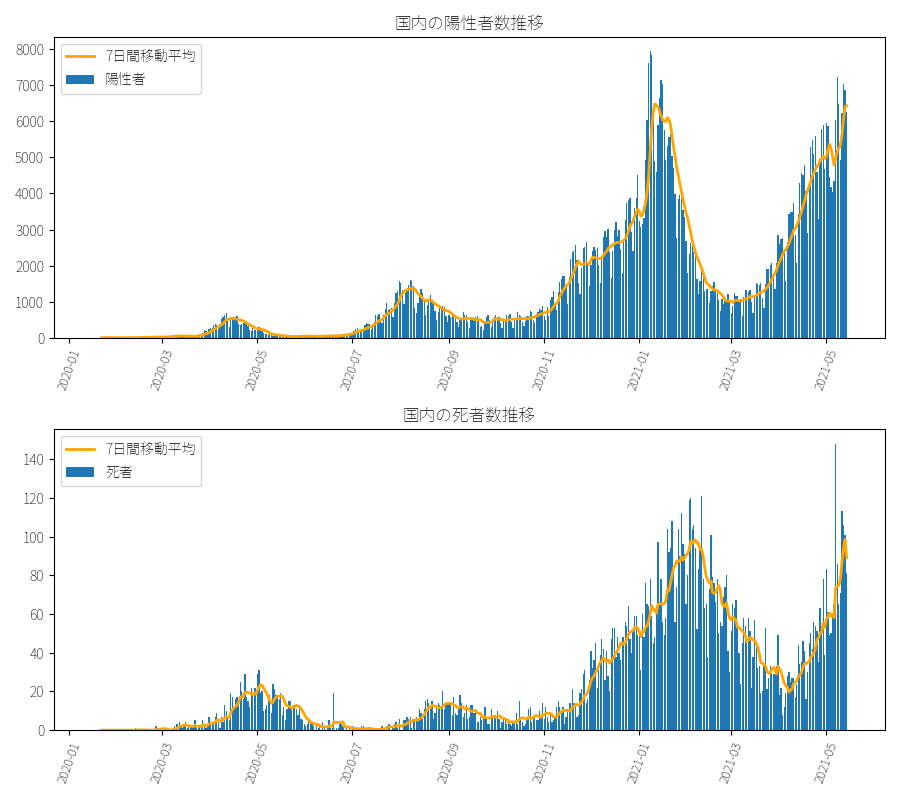

In [26]:
fig, ax = plt.subplots(2,1,figsize=(9,8),tight_layout=True)
p_ax = ax[0]
p_ax.set_title("国内の陽性者数推移")
p_ax.bar(all_jp["日付"],all_jp["各地の感染者数_1日ごとの発表数"],label="陽性者")
p_ax.plot_date(all_jp["日付"],all_jp["感染者数移動平均7"],label="7日間移動平均", fmt="-",lw=2.0, color="orange")
p_ax.tick_params(axis="x",rotation=70, labelsize=9)
p_ax.legend()
d_ax = ax[1]
d_ax.set_title("国内の死者数推移")
d_ax.bar(all_jp["日付"],all_jp["各地の死者数_1日ごとの発表数"],label="死者")
d_ax.plot_date(all_jp["日付"],all_jp["死者数移動平均7"],label="7日間移動平均", fmt="-",lw=2.0, color="orange")
d_ax.tick_params(axis="x",rotation=70, labelsize=9)
d_ax.legend()

<IPython.core.display.Javascript object>


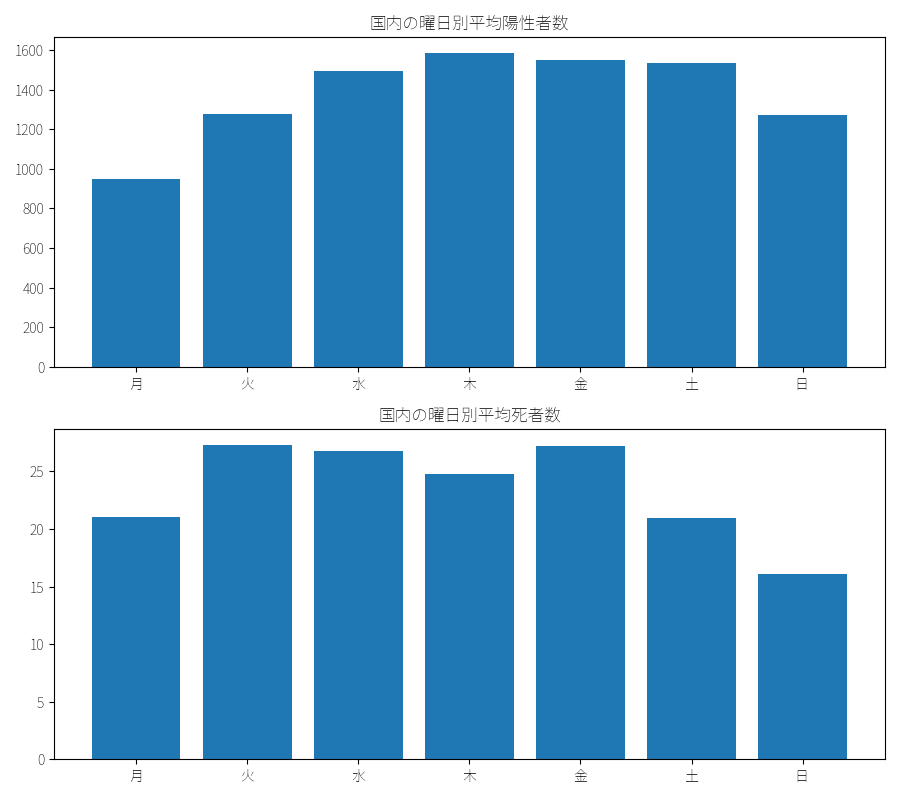

<BarContainer object of 7 artists>

In [27]:
fig, ax = plt.subplots(2,1,figsize=(9,8),tight_layout=True)
wp_ax = ax[0]
wp_ax.set_title("国内の曜日別平均陽性者数")
wp_ax.bar(all_jp_week_mean["曜日"],all_jp_week_mean["各地の感染者数_1日ごとの発表数"])
wd_ax = ax[1]
wd_ax.set_title("国内の曜日別平均死者数")
wd_ax.bar(all_jp_week_mean["曜日"],all_jp_week_mean["各地の死者数_1日ごとの発表数"])

## 直近の推移

In [28]:
all_jp_latest = all_jp.loc[all_jp["日付"]>="2021-03-01"]
all_jp_latest.head()

,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,weekday,感染者数移動平均7,死者数移動平均7
410,2021-03-01,684,51,0,1000.714286,57.000000
411,2021-03-02,887,65,1,973.285714,58.571429
412,2021-03-03,1240,63,2,1019.000000,57.714286
413,2021-03-04,1167,67,3,1032.142857,56.714286
414,2021-03-05,1146,55,4,1046.428571,53.142857


<IPython.core.display.Javascript object>


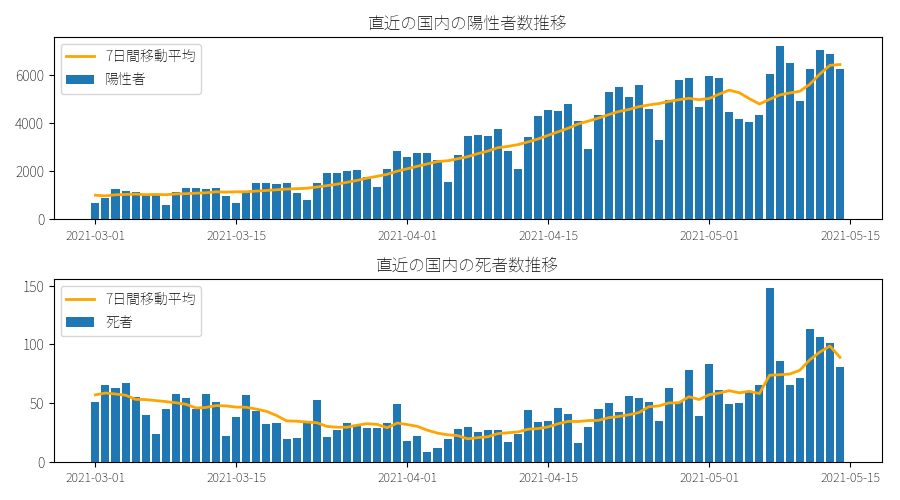

In [29]:
fig, ax = plt.subplots(2,1,figsize=(9,5),tight_layout=True)
p_ax = ax[0]
p_ax.set_title("直近の国内の陽性者数推移")
p_ax.bar(all_jp_latest["日付"],all_jp_latest["各地の感染者数_1日ごとの発表数"],label="陽性者")
p_ax.plot_date(all_jp_latest["日付"],all_jp_latest["感染者数移動平均7"],label="7日間移動平均", fmt="-",lw=2.0, color="orange")
p_ax.tick_params(axis="x",labelsize=9)
p_ax.legend()

d_ax = ax[1]
d_ax.set_title("直近の国内の死者数推移")
d_ax.bar(all_jp_latest["日付"],all_jp_latest["各地の死者数_1日ごとの発表数"],label="死者")
d_ax.plot_date(all_jp_latest["日付"],all_jp_latest["死者数移動平均7"],label="7日間移動平均", fmt="-",lw=2.0, color="orange")
d_ax.tick_params(axis="x", labelsize=9)
d_ax.legend()
